In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model, datasets, metrics
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline

%matplotlib inline   
plt.rcParams['image.cmap'] = 'gray'

In [32]:
#function to plot image
def gen_mnist_image(X):
    return np.rollaxis(np.rollaxis(X[0:200].reshape(20, -1, 28, 28), 0, 2), 1, 3).reshape(-1, 20 * 28)

In [33]:
train = pd.read_csv('/Users/Kevin/Files/Thinkful/Data Files/sign-language-mnist/sign_mnist_train.csv').values[:,1:]
X_train = (train - np.min(train, 0)) / (np.max(train, 0) + 0.0001)  # 0-1 scaling

test = pd.read_csv('/Users/Kevin/Files/Thinkful/Data Files/sign-language-mnist/sign_mnist_test.csv').values[:,1:]
X_test = (test - np.min(test, 0)) / (np.max(test, 0) + 0.0001)  # 0-1 scaling

In [34]:
train_1 = pd.read_csv('/Users/Kevin/Files/Thinkful/Data Files/sign-language-mnist/sign_mnist_train.csv')
Y_train = train_1.iloc[:,0]

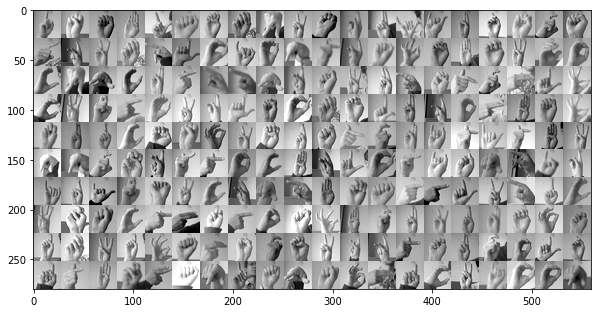

In [35]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(X_train));

In [36]:
#plt.figure(figsize=(10,20))
#plt.imshow(gen_mnist_image(X_test));

In [37]:
from sklearn.neural_network import BernoulliRBM
rbm = BernoulliRBM(n_components=100, learning_rate=0.01, random_state=0, verbose=True)
logistic = linear_model.LogisticRegression()

classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

In [38]:
rbm.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -486.11, time = 4.97s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -479.02, time = 5.82s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -472.76, time = 6.63s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -470.58, time = 6.16s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -467.28, time = 6.58s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -466.39, time = 6.12s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -468.56, time = 6.25s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -464.15, time = 7.11s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -462.05, time = 7.07s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -464.24, time = 6.77s


BernoulliRBM(batch_size=10, learning_rate=0.01, n_components=100, n_iter=10,
       random_state=0, verbose=True)

In [39]:
xx = X_train[:40].copy()
for ii in range(1000):
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n])

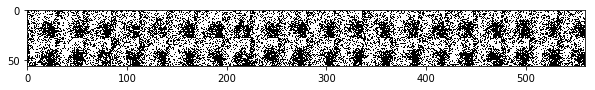

In [40]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(xx))

In [41]:
xx = X_train[:40].copy()
for ii in range(10000):
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n])

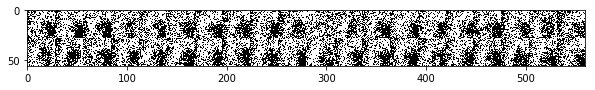

In [42]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(xx))

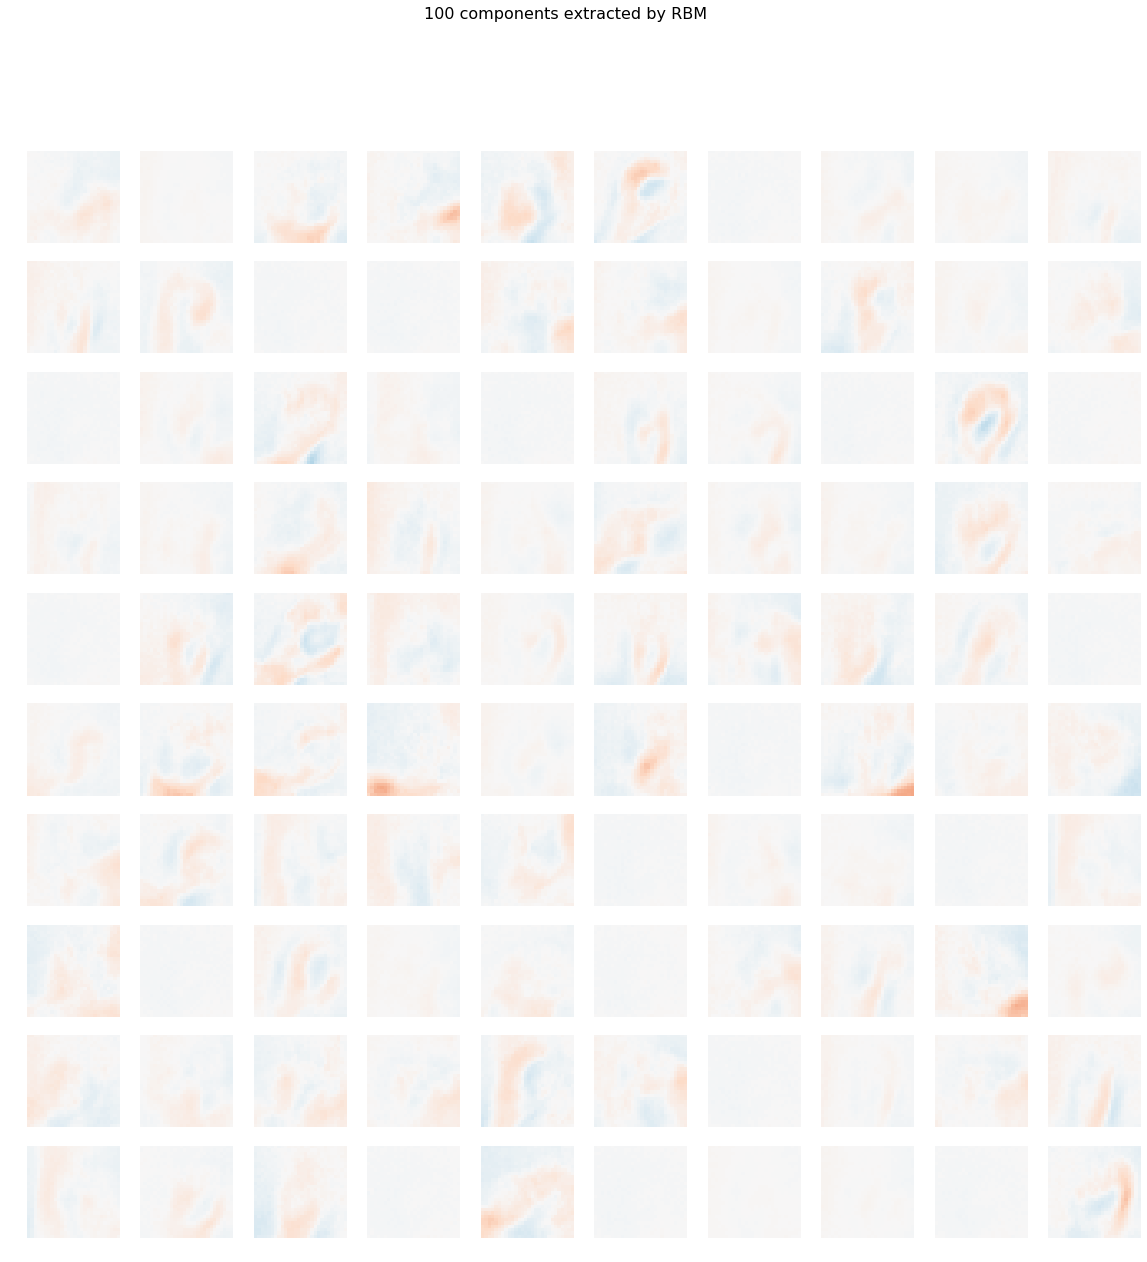

In [43]:
plt.figure(figsize=(20, 20))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.RdBu,
               interpolation='nearest', vmin=-2.5, vmax=2.5)
    plt.axis('off')
plt.suptitle('100 components extracted by RBM', fontsize=16);

In [44]:
# Training RBM-Logistic Pipeline
classifier.fit(X_train, Y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -486.11, time = 4.58s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -479.02, time = 5.33s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -472.76, time = 5.32s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -470.58, time = 8.42s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -467.28, time = 5.57s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -466.39, time = 5.60s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -468.56, time = 5.50s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -464.15, time = 5.51s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -462.05, time = 5.53s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -464.24, time = 5.49s


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('rbm', BernoulliRBM(batch_size=10, learning_rate=0.01, n_components=100, n_iter=10,
       random_state=0, verbose=True)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [45]:
# Evaluation
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        Y_train,
        classifier.predict(X_train))))

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.61      0.74      0.67      1126
           1       0.48      0.70      0.57      1010
           2       0.89      0.92      0.90      1144
           3       0.63      0.62      0.62      1196
           4       0.68      0.64      0.66       957
           5       0.80      0.66      0.72      1204
           6       0.78      0.54      0.64      1090
           7       0.68      0.64      0.66      1013
           8       0.47      0.60      0.53      1162
          10       0.70      0.59      0.64      1114
          11       0.58      0.78      0.66      1241
          12       0.62      0.41      0.49      1055
          13       0.67      0.52      0.59      1151
          14       0.88      0.81      0.84      1196
          15       0.92      0.94      0.93      1088
          16       0.96      0.93      0.94      1279
          17       0.44      0.44      0.